# First Tensorflow Neural Network

## TF GRAPHS

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

### Data setup
Setting up some random data for demostration

In [3]:
rand_a = np.random.uniform(0,100, (5,5))

In [4]:
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [5]:
rand_b = np.random.uniform(0,100, (5,1))

In [6]:
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

### Placeholders

In [7]:
a = tf.placeholder(tf.float32)

In [8]:
b = tf.placeholder(tf.float32)

### Operations

In [9]:
add_op = a + b

In [10]:
mul_op = a * b

We can use tf.add() and tf.multiply() methods but what is so good about Tensorflow is that it can understand Python builtin operations

### Sessions

In [11]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict= {a:rand_a, b:rand_b})
    print(add_result)
    
    print('\n')
    
    mult_result = sess.run(mul_op, feed_dict= {a:rand_a, b:rand_b})
    print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


Above is the really simple example of running session by creating graphs with feed dictionary

### Example Neural Network

In [12]:
n_features = 10
n_dense_neurons = 3

In [13]:
x = tf.placeholder(tf.float32, (None, n_features))

In [14]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

Here, W is going to be multiplied by x. So, we have to make sure that dimension of x should match the dimension of W. For bias b, it needs to match the number of neurons

### Operation Activation function

In [15]:
xW = tf.matmul(x,W)

z = tf.add(xW,b)

In [16]:
a = tf.sigmoid(z)

### Variable initializer !!!

In [17]:
init = tf.global_variables_initializer()

In [18]:
with tf.Session() as sess:
    
    sess.run(init)
    
    layer_out = sess.run(a, feed_dict= {x: np.random.random([1,n_features])})

In [19]:
print(layer_out)

[[0.19592889 0.8423014  0.36188066]]


### Simple regression example

In [20]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [21]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [22]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [24]:
import matplotlib.pyplot as plt

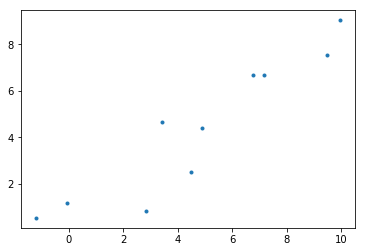

In [25]:
plt.plot(x_data, y_label, '.')

y = mx+b
#### Variables

In [27]:
np.random.rand(2)

array([0.47816742, 0.46111934])

In [28]:
m = tf.Variable(0.47)
b = tf.Variable(0.46)

### Cost function

In [29]:
error = 0

for x,y in zip(x_data, y_label):
    
    y_pred = m*x + b
    
    error += (y-y_pred)**2

### Optimizer

In [31]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [32]:
init = tf.global_variables_initializer()

### Session

In [33]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

### Evaluation

In [34]:
x_test = np.linspace(-1,11,10)

In [35]:
y_pred_plot = final_slope*x_test + final_intercept

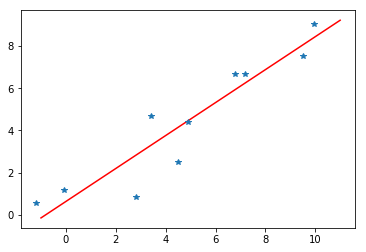

In [40]:
plt.plot(x_test, y_pred_plot,'r')
plt.plot(x_data, y_label, '*')